# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))
    
    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image
        
    return image_array, image_label

In [3]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [4]:
## load dataset here
## Addding a line to tessing the pull request change
df = pd.read_csv("../data/icml_face_data.csv")
df.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [17]:
tmp = np.array(df.iloc[1,1]).astype(np.int64)

ValueError: invalid literal for int() with base 10: '151 150 147 155 148 133 111 140 170 174 182 154 153 164 173 178 185 185 189 187 186 193 194 185 183 186 180 173 166 161 147 133 172 151 114 161 161 146 131 104 95 132 163 123 119 129 140 120 151 149 

The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [5]:
## parsing data here
images, labels = parse_data(df)


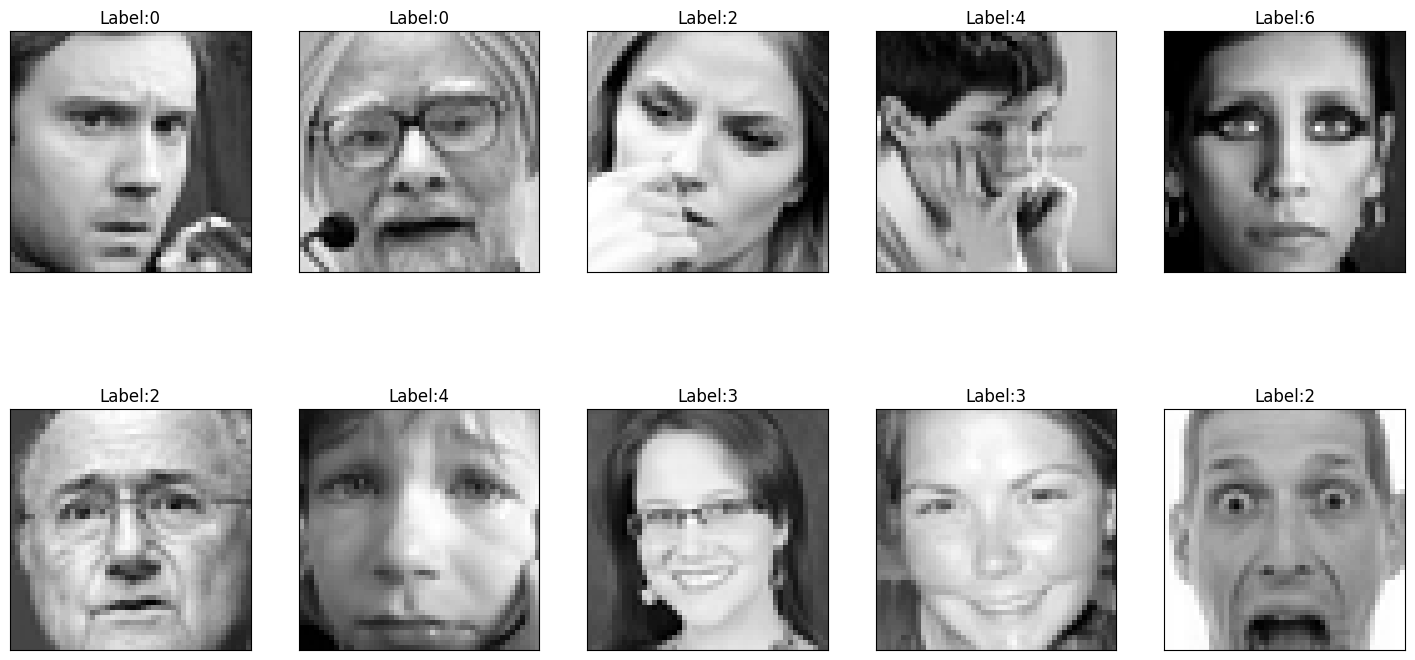

In [6]:
## showing images here
show_img(images, labels)

## **Extracting data array to many columns each number in the array is a separate column**

In [7]:
# Function to convert string representation of list to a list of numbers
def str_to_num_list(s):
    # Remove brackets and split the string by space, then convert to integers
    return [int(num) for num in s.strip('[]').split(' ')]


# Apply the function to the 'array_data' column
df['pixels'] = df['pixels'].apply(str_to_num_list)

In [8]:
df_expand = df['pixels'].apply(pd.Series)

df = pd.concat([df.drop('pixels', axis=1), df_expand], axis=1)

df.head()

,emotion,0,1,2,3,4,5,6,7,8,...,2294,2295,2296,2297,2298,2299,2300,2301,2302,2303
0,0,70,80,82,72,58,58,60,63,54,...,159,182,183,136,106,116,95,106,109,82
1,0,151,150,147,155,148,133,111,140,170,...,105,108,95,108,102,67,171,193,183,184
2,2,231,212,156,164,174,138,161,173,182,...,104,138,152,122,114,101,97,88,110,152
3,4,24,32,36,30,32,23,19,20,30,...,174,126,132,132,133,136,139,142,143,142
4,6,4,0,0,0,0,0,0,0,0,...,12,34,31,31,31,27,31,30,29,30


## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
# Reshape images to 2D-array
flattened_images = images.reshape(images.shape[0], -1)

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

pca=PCA(n_components=6)
# pca.fit(images) ## modify images' array to the appropriate shape




In [33]:
df_pca_data = df.copy().drop(columns=['emotion'])

# Step 1: Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_pca_data)

In [34]:
principal_components = pca.fit_transform(scaled_data)

In [35]:
# Step 3: Create a DataFrame with the principal components
df_pca = pd.DataFrame(data=principal_components, columns=['principal_component_1', 'principal_component_2', 'principal_component_3', 'principal_component_4', 'principal_component_5', 'principal_component_6'])


In [36]:
print(df_pca)

       principal_component_1  principal_component_2  principal_component_3  \
0                   6.783567             -11.617640               9.576445   
1                   4.699847              12.560507              -4.433965   
2                 -27.429072             -15.727640              20.720555   
3                   2.344612              17.150039             -14.941885   
4                  18.269088             -29.455773             -20.316984   
...                      ...                    ...                    ...   
35882              53.617340               8.782705             -12.768904   
35883             -31.877533               6.355416               4.065976   
35884             -28.108931             -16.780632             -11.498158   
35885              29.341946              -7.962239               7.449282   
35886              -7.554521             -11.594394               5.956973   

       principal_component_4  principal_component_5  principal_

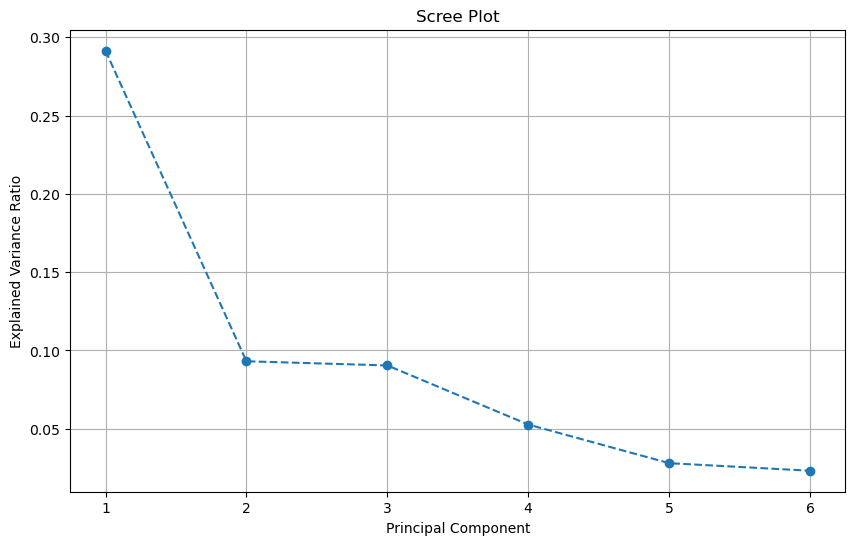

In [37]:
# Step 3: Create a Scree plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.grid()
plt.show()

In [48]:
# Get the loadings (coefficients of the original variables)
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)

print(len(loadings[:,0:3]))

2304


In [52]:
pca.explained_variance_

array([671.52296219, 214.44518959, 208.29378799, 121.3263981 ,
        64.4550773 ,  53.33786257])

In [15]:
## transform for visualizing here
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape
# images_pca.shape

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [14]:
## determine the optimal number of PCs here
## pca.explained_variance_()

## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


In [16]:
flattened_images.shape

(35887, 2304)

In [10]:
## splitting data into train/val/test subsets here
X_train, X_test, y_train, y_test = train_test_split(
    flattened_images, labels, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.2, random_state=42)




RandomForestClassifier(random_state=42)

### **3.1. Logistic Regression**

In [21]:
def build_model_lr(X, y):

    pipe_lr = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', LogisticRegression())
    ])

    param_grid_lr = {
    'clf__C': [0.1, 1, 10],
    'clf__solver': ['liblinear']
    }

    # Perform GridSearchCV
    grid_lr = GridSearchCV(pipe_lr, param_grid_lr, cv=5, n_jobs=-1)
    grid_lr.fit(X, y)

    print("Best parameter (CV score=%0.3f):" % grid_lr.best_score_)
    print(grid_lr.best_params_)

    return grid_lr

#### Original data

In [22]:
# fit model 
lr = build_model_lr(X_train, y_train)

In [ ]:
# training accuracy
y_pred = lr.predict(X_val)
acc_val_lr = accuracy_score(y_val, y_pred)
print(acc_val_lr)

#### Transformed data

In [ ]:
# output: pca_acc_val_lr

### **3.2. Random Forest**

In [ ]:
def build_model_rf(X, y):

    # Define pipeline for Random Forest
    pipe_rf = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', RandomForestClassifier())
    ])

    # Hyperparameters for GridSearchCV
    param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20]
    }

    # Perform GridSearchCV
    grid_rf = GridSearchCV(pipe_rf, param_grid_rf, cv=5, n_jobs=-1)
    grid_rf.fit(X, y)

    print("Best parameter (CV score=%0.3f):" % grid_rf.best_score_)
    print(grid_rf.best_params_)

    return grid_rf

#### Original data

In [ ]:
# fit model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

In [ ]:
# fit model 
rf = build_model_rf(X_train, y_train)

In [ ]:
# training accuracy
y_pred_rf = rf.predict(X_val)
acc_val_rf = accuracy_score(y_val, y_pred)
print(acc_val_rf)

#### Transformed data

### **3.3. SVM**

In [ ]:
def build_model_svm(X, y):

    # Define pipeline for Random Forest
    pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', SVC())
    ])

    # Hyperparameters for GridSearchCV
    param_grid_svm = {
    'clf__C': [0.1, 1, 10, 100],
    'clf__kernel': ['linear', 'rbf']
    }

    # Perform GridSearchCV
    grid_svm = GridSearchCV(pipe_svm, param_grid_svm, cv=5, n_jobs=-1)
    grid_svm.fit(X, y)

    print("Best parameter (CV score=%0.3f):" % grid_svm.best_score_)
    print(grid_svm.best_params_)

    return grid_svm

#### Original data

In [ ]:
# fit model 
svm = build_model_svm(X_train, y_train)

In [ ]:
# training accuracy
y_pred_rf = lr.predict(X_val)
acc_val_svm = accuracy_score(y_val, y_pred)
print(acc_val_svm)

#### Transformed data

### **3.4. MLP**

In [ ]:
def build_model_mlp(X, y):

    # Define pipeline for Random Forest
    pipe_mlp = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPClassifier())
    ])

    # Hyperparameters for GridSearchCV
    param_grid_mlp = {
    'clf__hidden_layer_sizes': [(100,), (100, 100)],
    'clf__activation': ['relu', 'tanh'],
    'clf__solver': ['adam'],
    'clf__alpha': [0.0001, 0.001]
    }

    # Perform GridSearchCV
    grid_mlp = GridSearchCV(pipe_mlp, param_grid_mlp, cv=5, n_jobs=-1)
    grid_mlp.fit(X, y)

    print("Best parameter (CV score=%0.3f):" % grid_mlp.best_score_)
    print(grid_mlp.best_params_)

    return grid_mlp

#### Original data

In [ ]:
# fit model 
mlp = build_model_mlp(X_train, y_train)

In [ ]:
# training accuracy
y_pred_rf = lr.predict(X_val)
acc_val_mlp = accuracy_score(y_val, y_pred)
print(acc_val_mlp)

#### Transformed data

### Compare the performance on val set

In [ ]:
from tabulate import tabulate

data_header = ['Model with', 'Original data', 'Transformed data']
data_values = [
      ['Logistic Regression', acc_val_lr, pca_acc_val_lr],
      ['Random Forest', acc_val_rf, pca_acc_val_rf],
      ['SVM', acc_val_svm, pca_acc_val_svm],
      ['MLP', acc_val_mlp, pca_acc_val_mlp]
]

In [ ]:
# Generate the table
result = tabulate(
data_values,
headers=data_header,
tablefmt='fancy_grid',
)
# Print the resulting table
print(result)


In [ ]:
# images_pca=pca.transform(images) ## modify images' array to the appropriate shape

## 4. Evaluating Classification Performance

Compare the performance of the different classification models using various metrics: accuracy, precision, recall, and F1-score.
Based on the evaluation metrics, explain which model performs best and why. Identify the emotion category where the model makes the most accurate and most errors. (1 point)



In [13]:
## visualize the confusion matrices and classification reports here